### Implement linear regression on any real time application.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.calibration import LabelEncoder

In [2]:
#Reading CSV file
dataset = pd.read_csv('Dataset/cyber_crimes.csv')
df = pd.DataFrame(dataset)
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


In [3]:
# Encoding categorical data
for f in df.columns:
    if df[f].dtype=='object': 
        label_encoder = LabelEncoder()
        label_encoder.fit(list(df[f].values))
        df[f] = label_encoder.transform(list(df[f].values))
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,0,1,616,931,1207,4.4,520.3,2.3
1,2,0,2,4,1,7,0.0,14.9,0.5
2,3,0,3,696,1120,2022,7.4,340.4,5.9
3,4,0,4,309,433,374,1.4,1183.3,0.3
4,5,0,6,90,171,139,0.5,284.7,0.5


In [4]:
#Splitting the dataset into training and test set.
features = df[['2016', '2017', '2018']]
target = df['Rate of Total Cyber Crimes (2018)++']
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size= 1/3, random_state=0)

In [5]:
print('Y train: \n', y_train)
print('X train: \n', x_train)

Y train: 
 33    1.0
28    0.3
32    0.0
8     0.9
13    0.9
5     1.9
17    0.5
14    2.9
7     1.5
26    2.8
1     0.5
12    1.0
25    0.5
24    3.3
6     1.0
23    0.4
4     0.5
18    0.1
21    1.4
19    1.9
9     0.5
34    6.0
3     0.3
0     2.3
Name: Rate of Total Cyber Crimes (2018)++, dtype: float64
X train: 
     2016  2017  2018
33    98   162   189
28   478   568   335
32     0     0     0
8     31    56    69
13   258   490   740
5     31    13    29
17     1    10     6
14  2380  3604  3511
7    401   504   418
26  2639  4971  6280
1      4     1     7
12   283   320   340
25     8     7    20
24   593  1209  1205
6    362   458   702
23   144   228   295
4     90   171   139
18     2     0     2
21   941  1304  1104
19   317   824   843
9     28    63    73
34     0     0     4
3    309   433   374
0    616   931  1207


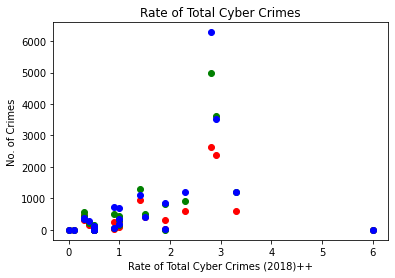

In [6]:
#Visualizing the Training set results
plt.scatter(y_train, x_train['2016'], color="red")
plt.scatter(y_train, x_train['2017'], color="green")
plt.scatter(y_train, x_train['2018'], color="blue")
plt.title("Rate of Total Cyber Crimes")
plt.xlabel("Rate of Total Cyber Crimes (2018)++")
plt.ylabel("No. of Crimes")
plt.show()

In [7]:
both = pd.DataFrame(x_train).join(pd.DataFrame(y_train))
both

,2016,2017,2018,Rate of Total Cyber Crimes (2018)++
33,98,162,189,1.0
28,478,568,335,0.3
32,0,0,0,0.0
8,31,56,69,0.9
13,258,490,740,0.9
5,31,13,29,1.9
17,1,10,6,0.5
14,2380,3604,3511,2.9
7,401,504,418,1.5
26,2639,4971,6280,2.8


C:\Users\shubh\AppData\Local\Temp\ipykernel_16572\662341461.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = both.groupby('Rate of Total Cyber Crimes (2018)++')['2016', '2017', '2018'].sum().plot(kind='bar', figsize=(12,6), rot=45, title='Rate of Total Cyber Crimes')


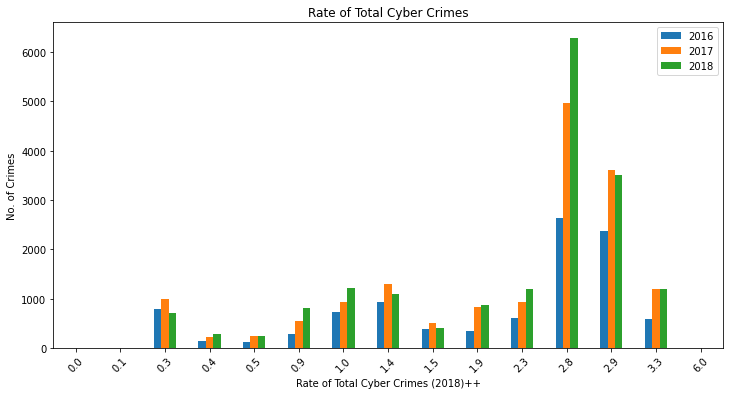

In [8]:
import matplotlib.pyplot as plt

ax = both.groupby('Rate of Total Cyber Crimes (2018)++')['2016', '2017', '2018'].sum().plot(kind='bar', figsize=(12,6), rot=45, title='Rate of Total Cyber Crimes')
plt.xlabel('Rate of Total Cyber Crimes (2018)++')
plt.ylabel('No. of Crimes')

plt.show()

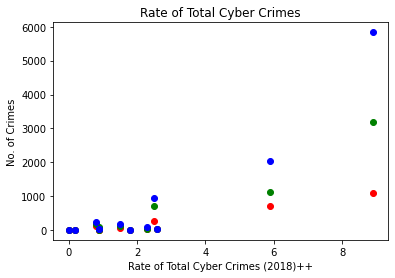

In [9]:
#Visualizing the Test set results
plt.scatter(y_test, x_test['2016'], color="red")
plt.scatter(y_test, x_test['2017'], color="green")
plt.scatter(y_test, x_test['2018'], color="blue")
plt.title("Rate of Total Cyber Crimes")
plt.xlabel("Rate of Total Cyber Crimes (2018)++")
plt.ylabel("No. of Crimes")
plt.show()

In [10]:
#Fitting the Simple Linear Regression model to the training dataset   
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [11]:
model.coef_, model.intercept_

(array([-0.0025911 ,  0.00322907, -0.00112412]), 1.0724589525225081)

In [12]:
#Prediction of Test set result  
y_pred = model.predict(x_test)

print('Y prediction: \n', y_pred)

Y prediction: 
 [1.07309692 1.10781834 1.01415486 1.07469695 1.0719728  1.25030856
 1.68086306 0.61264106 1.90499188 1.06650402 1.11999091 1.06768443]


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mse)
r2 = r2_score(y_test, y_pred)
print("\nR2 score:", mse)


Mean Squared Error: 7.03142656366823

Mean Absolute Error: 7.03142656366823

R2 score: 7.03142656366823


In [21]:
import plotly
import plotly.graph_objs as go

# Plot the data points and the linear regression line
markercolor = y_pred
fig1 = go.Scatter3d(x=both['2016'],
                    y=both['2017'],
                    z=both['2018'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="2016"),
                                yaxis=dict( title="2017"),
                                zaxis=dict(title="2018")),)
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("Lab04_4DPlot.html"))

'Lab04_4DPlot.html'